In [1]:
import numpy as np
import csv
import math
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
%matplotlib inline

In [2]:
def add_repository_name(array, repoName, exampleNumber):
    
    """
    Adds repository name as one_hot to the feature-example matrix for learning

    Arguments:
    array -- feature-example matrix
    repoName -- name of the repository in the current example
    exampleNumber -- current example number

    Return:
    None
    """
    
    if (repoName == 'mlm'):
        array[0][exampleNumber] = 1
    elif (repoName == 'standard'):
        array[1][exampleNumber] = 1
    elif (repoName == 'agent'):
        array[2][exampleNumber] = 1
    elif (repoName == 'conductor'):
        array[3][exampleNumber] = 1
    elif (repoName == 'dockers'):
        array[4][exampleNumber] = 1
    elif (repoName == 'sensor'):
        array[5][exampleNumber] = 1

def add_day_time(array, date, exampleNumber):
    
    """
    Adds time of the day (morning = am; evening = pm) as one_hot to the feature-example matrix for learning

    Arguments:
    array -- feature-example matrix
    date -- date of the commit in the current example
    exampleNumber -- current example number

    Return:
    None
    """
    
    format = '%Y-%m-%dT%H:%M:%S'
    
    dateOfCommit = datetime.strptime(date, format)
    
    hour = dateOfCommit.hour + dateOfCommit.minute / 60. + dateOfCommit.second / 3600
    
    if (hour < 12):
        # am
        array[6][exampleNumber] = 1
    else:
        # pm
        array[7][exampleNumber] = 1
        
def add_name(array, name, exampleNumber):
    
    """
    Adds name of the committer as one_hot to the feature-example matrix for learning

    Arguments:
    array -- feature-example matrix
    name -- name of the person who's made the commit in the current example
    exampleNumber -- current example number

    Return:
    None
    """
    
    if (name == 'Victor'):
        array[8][exampleNumber] = 1
    elif (name == 'Peggy'):
        array[9][exampleNumber] = 1
    elif (name == 'Wendy'):
        array[10][exampleNumber] = 1
    elif (name == 'Trudy'):
        array[11][exampleNumber] = 1
    elif (name == 'Mallory'):
        array[12][exampleNumber] = 1
    elif (name == 'Eve'):
        array[13][exampleNumber] = 1
    elif (name == 'Dabe'):
        array[14][exampleNumber] = 1
    elif (name == 'Carol'):
        array[15][exampleNumber] = 1
    elif (name == 'Bob'):
        array[16][exampleNumber] = 1
        
def add_commit_message_length(array, message, exampleNumber):
    
    """
    Adds length of the current commit to the feature-example matrix for learning

    Arguments:
    array -- feature-example matrix
    message -- commit message in the current example
    exampleNumber -- current example number

    Return:
    None
    """
    
    length = len(message.split(' '))
    
    array[17][exampleNumber] = length

In [3]:
# Numpy array of features and examples would have a size of 18 by 319 (rows are features, columns are examples)
def preprocessing(X,Y,commit_messages):
    
    """
    Reads the file and extracts the useful information from it for learning

    Arguments:
    X -- feature-example matrix
    Y -- corresponding labels for the feature-example matrix
    commit_messages -- saved commit messages, not used in training, but used later on for viewing misclassified examples

    Return:
    Returns the updated arguments
    """

    with open('train.csv', newline='') as csvfile:
        rowreader = csv.reader(csvfile, 'excel')

        # Example number
        npColumnNum = 0

        # Feature number
        npRowNum = 0

        firstRow = True

        for row in rowreader:
            # First row contains descriptions of columns, so ignore
            if (not firstRow):

                for element in row:

                    # First row = first feature = repo name
                    if (npRowNum == 0):
                        add_repository_name(X, element, npColumnNum)
                    elif (npRowNum == 1):
                        # We assume that commit hash is not informative
                        pass
                    # Date
                    elif (npRowNum == 2):
                        add_day_time(X, element, npColumnNum)
                    # Name of the committer
                    elif (npRowNum == 3):
                        add_name(X, element, npColumnNum)
                    # Commit message
                    elif (npRowNum == 4):
                        add_commit_message_length(X, element, npColumnNum)
                        commit_messages[0][npColumnNum] = element
                    # Classification
                    elif (npRowNum == 5):
                        Y[0][npColumnNum] = element

                    npRowNum += 1

                npColumnNum += 1

                # Go back to the first row
                npRowNum = 0
            else:
                firstRow = False
    
    return X, Y, commit_messages

In [4]:
def xy_shuffle(X,Y,commit_messages):
    
    """
    Shuffles the training matrix, corresponding labels and corresponding commit messages

    Arguments:
    X -- feature-example matrix
    Y -- corresponding labels for the feature-example matrix
    commit_messages -- saved commit messages, not used in training, but used later on for viewing misclassified examples

    Return:
    Returns the updated arguments
    """
    
    my_X, my_Y, commit_Messages = preprocessing(X,Y,commit_messages)
    
    my_X, my_Y, commit_Messages = shuffle(my_X.T, my_Y.T, commit_Messages.T, random_state=0)

    my_X = my_X.T
    my_Y = my_Y.T
    commit_Messages = commit_Messages.T
    
    # Plots commit length by number of bugs
    
    feat = my_X[17,:].reshape(1,319)

    plt.plot(feat, my_Y, 'go')
    plt.xlabel('Length of commit message (words)'); plt.ylabel('Number of bugs')
    plt.show()
    
    return my_X, my_Y, commit_Messages

In [5]:
def split(X,Y,commit_messages):
    
    """
    Splits the training matrix, corresponding labels and corresponding commit messages into train, dev and test sets
    
    Splits as follows: train set = 60%, dev set = 20%, test set = 20% (as we have only 319 examples)

    Arguments:
    X -- feature-example matrix
    Y -- corresponding labels for the feature-example matrix
    commit_messages -- saved commit messages, not used in training, but used later on for viewing misclassified examples

    Return:
    Returns the sets after the split process
    """
    
    shuffled_X, shuffled_Y, shuffled_Commit_Messages = xy_shuffle(X,Y,commit_messages)
    
    train_X = shuffled_X[:,0:191]
    train_Y = shuffled_Y[:,0:191]
    train_Commit = shuffled_Commit_Messages[:,0:191]

    dev_X = shuffled_X[:,191:255]
    dev_Y = shuffled_Y[:,191:255]
    dev_Commit = shuffled_Commit_Messages[:,191:255]

    test_X = shuffled_X[:,255:320]
    test_Y = shuffled_Y[:,255:320]
    test_Commit = shuffled_Commit_Messages[:,255:320]
    
    return train_X,train_Y,train_Commit,dev_X,dev_Y,dev_Commit,test_X,test_Y,test_Commit

In [6]:
def relu(x):
    
    """
    Compute the relu of x

    Arguments:
    x -- A scalar or numpy array of any size.

    Return:
    s -- relu(x)
    """
    
    s = np.maximum(0,x)
    
    return s

def initialise_parameters(layers_dimensions):
    
    """
    Initialises parameters in a smart way

    Arguments:
    layers_dimensions -- dimensions of the neural net (eg: [18,5,5,1]) = 18 features,
                                                    5 units in layer 1, 5 units in layer 2, 1 unit in output layer

    Return:
    Initialised parameters: W and b for every layer l
    """
    
    # Number of layers in the network
    L = len(layers_dimensions)
    
    np.random.seed(7)
    
    parameters = {}
    
    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layers_dimensions[l], layers_dimensions[l-1]) * np.sqrt(2/layers_dimensions[l-1])
        parameters['b' + str(l)] = np.zeros((layers_dimensions[l], 1))
    
    return parameters

def forward_propagation(X, parameters):
    
    """
    Performs forward propagation on the neural network

    Arguments:
    X -- feature-example matrix
    parameters -- W and b for every layer l

    Return:
    A3 -- prediction of the number of bugs for every example
    cache -- cached values of W, b, Z and A for every layer (needed for back propagation)
    """
    
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    
    # Layer 1
    
    Z1 = np.dot(W1, X) + b1
    A1 = relu(Z1)
    
    # Layer 2
    
    Z2 = np.dot(W2, A1) + b2  
    A2 = relu(Z2)
    
    # Output layer
    
    Z3 = np.dot(W3, A2) + b3
    A3 = relu(Z3)
    
    cache = (W1,b1,Z1,A1, W2,b2,Z2,A2, W3,b3,Z3,A3)
    
    return A3, cache

# Computes L2 (Mean Square Error) loss
def compute_cost(A3, Y):
    
    """
    Computes the mean squared error cost after the forward propagation step to see how well the prediction was made

    Arguments:
    A3 -- prediction of the number of bugs for every example
    Y -- labels for the examples

    Return:
    cost -- mean squared error cost
    """
    
    m = Y.shape[1]
    
    squaredError = np.power((Y - A3), 2)
    
    cost = np.sum(squaredError, axis=1, keepdims=True)
    
    cost = cost / m
    
    return cost

def back_propagation(X, Y, cache):
    
    """
    Performs backward propagation on the neural network

    Arguments:
    X -- feature-example matrix
    Y -- labels for the examples
    cache -- cached values of W, b, Z and A for every layer

    Return:
    gradients -- gradients for W, b, Z, A for every layer (dA is not computed for last layer)
    """
    
    m = X.shape[1]
    (W1,b1,Z1,A1,W2,b2,Z2,A2,W3,b3,Z3,A3) = cache
    
    # Output layer
    
    dZ3 = 2 * A3 - 2 * Y
    dW3 = (1/m) * np.dot(dZ3, A2.T)
    db3 = (1/m) * np.sum(dZ3, axis = 1, keepdims = True)
    
    # Layer 2
    
    dA2 = np.dot(W3.T, dZ3)
    dZ2 = np.multiply(dA2, np.int64(A2 > 0))
    dW2 = (1/m) * np.dot(dZ2, A1.T)
    db2 = (1/m) * np.sum(dZ2, axis = 1, keepdims = True)
    
    # Layer 1
    
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = np.multiply(dA1, np.int64(A1 > 0))
    dW1 = (1/m) * np.dot(dZ1, X.T)
    db1 = (1/m) * np.sum(dZ1, axis = 1, keepdims = True)
    
    gradients = {"dZ3": dZ3, "dW3": dW3, "db3": db3,
                 "dA2": dA2, "dZ2": dZ2, "dW2": dW2, "db2": db2,
                 "dA1": dA1, "dZ1": dZ1, "dW1": dW1, "db1": db1}
    
    return gradients

def update_parameters(parameters, gradients, alpha):
    
    """
    Updates parameters according to the gradients, towards minimising the cost function

    Arguments:
    parameters -- W and b for every layer l
    gradients -- gradients for W, b, Z, A for every layer (dA is not computed for last layer)
    alpha -- learning rate

    Return:
    parameters -- updated parameters W and b for every layer l
    """
    
    paramNum = len(parameters) // 2
    
    for i in range(paramNum):
        parameters['W' + str(i+1)] = parameters['W' + str(i+1)] - alpha * (gradients['dW' + str(i+1)])
        parameters['b' + str(i+1)] = parameters['b' + str(i+1)] - alpha * (gradients['db' + str(i+1)])
        
    return parameters

def predict(X, Y, parameters):
    
    """
    Makes a prediction having the trained parameters on a set X and returns accuracy according to Y

    Arguments:
    X -- feature-example matrix
    Y -- labels for the examples
    parameters -- trained W and b for every layer l

    Return:
    accuracy -- accuracy of predicting on the whole set X
    """
    
    m = X.shape[1]
    prediction = np.zeros((1,m), dtype = np.int)
    
    A3, caches = forward_propagation(X, parameters)
    
    # Convert decimal predictions into an integer prediction for number of bugs
    for i in range(0, A3.shape[1]):
        prediction = np.round(A3, 0)
    
    accuracy = np.mean((prediction[0,:] == Y[0,:]))
    
    return accuracy

In [7]:
def dictionary_to_vector(parameters):
    """
    Roll all our parameters dictionary into a single vector satisfying our specific required shape.
    """
    keys = []
    count = 0
    for key in ["W1", "b1", "W2", "b2", "W3", "b3"]:
        
        # Flatten parameter
        new_vector = np.reshape(parameters[key], (-1,1))
        keys = keys + [key]*new_vector.shape[0]
        
        if count == 0:
            theta = new_vector
        else:
            theta = np.concatenate((theta, new_vector), axis=0)
        count = count + 1

    return theta, keys

def vector_to_dictionary(theta):
    
    """
    Unroll all our parameters dictionary from the single vector satisfying our specific required shape.
    """
    
    parameters = {}
    parameters["W1"] = theta[:90].reshape((5,18))
    parameters["b1"] = theta[90:95].reshape((5,1))
    parameters["W2"] = theta[95:120].reshape((5,5))
    parameters["b2"] = theta[120:125].reshape((5,1))
    parameters["W3"] = theta[125:130].reshape((1,5))
    parameters["b3"] = theta[130:131].reshape((1,1))

    return parameters

def gradients_to_vector(gradients):
    
    """
    Roll all our gradients dictionary into a single vector satisfying our specific required shape.
    """
    
    count = 0
    for key in ["dW1", "db1", "dW2", "db2", "dW3", "db3"]:
        # flatten parameter
        new_vector = np.reshape(gradients[key], (-1,1))
        
        if count == 0:
            theta = new_vector
        else:
            theta = np.concatenate((theta, new_vector), axis=0)
        count = count + 1

    return theta

def gradient_check(parameters, gradients, X, Y, epsilon = 1e-7):
    
    """
    Performs the gradient check to make sure that back propagation step is computed correctly
    """
    
    # Set-up variables
    parameters_values, _ = dictionary_to_vector(parameters)
    grad = gradients_to_vector(gradients)
    num_parameters = parameters_values.shape[0]
    J_plus = np.zeros((num_parameters, 1))
    J_minus = np.zeros((num_parameters, 1))
    gradapprox = np.zeros((num_parameters, 1))
    
    # Compute gradapprox
    for i in range(num_parameters):
        
        # Compute J_plus[i]
        thetaplus = np.copy(parameters_values)                                       # Step 1
        thetaplus[i][0] = thetaplus[i][0] + epsilon                                  # Step 2
        A3_plus, _ = forward_propagation(X, vector_to_dictionary(thetaplus))         # Step 3
        J_plus[i] = compute_cost(A3_plus, Y)                                         # Step 4
        
        # Compute J_minus[i]
        thetaminus = np.copy(parameters_values)                                       # Step 1
        thetaminus[i][0] = thetaminus[i][0] - epsilon                                 # Step 2        
        A3_minus, _ = forward_propagation(X, vector_to_dictionary(thetaminus))        # Step 3
        J_minus[i] = compute_cost(A3_minus, Y)                                        # Step 4
        
        # Compute gradapprox[i]
        gradapprox[i] = (J_plus[i] - J_minus[i]) / (2 * epsilon)
    
    # Compare gradapprox to backward propagation gradients by computing difference
    numerator = np.linalg.norm(grad - gradapprox)                                     # Step 1
    denominator = np.linalg.norm(grad) + np.linalg.norm(gradapprox)                   # Step 2
    difference = numerator / denominator                                              # Step 3

    if difference > 2e-7:
        print ("\033[93m" + "There is a mistake in the backward propagation! difference = " + str(difference) + "\033[0m")
    else:
        print ("\033[92m" + "Back prop works fine. difference = " + str(difference) + "\033[0m")
    
    return difference

In [8]:
def model(X,Y,layers_dimensions, alpha = 0.005, num_iterations = 3000, print_cost=True):
    
    """
    Combines everyting into a single model
    """
    
    costs = []
    
    parameters = initialise_parameters(layers_dimensions)
    
    for i in range(0, num_iterations):
        
        A3, cache = forward_propagation(X, parameters)
        
        cost = compute_cost(A3, Y)
        
        gradients = back_propagation(X, Y, cache)
        
        # Check if the gradient was computed correctly starting from 81st iteration till 99 iteration
        # to make sure that I have made the correct back propagation algorithm
        if ((i > 80) & (i < 100)):
            difference = gradient_check(parameters, gradients, X, Y)
        
        parameters = update_parameters(parameters, gradients, alpha)
        
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
        
    
    # Plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(alpha))
    plt.show()
    
    return parameters

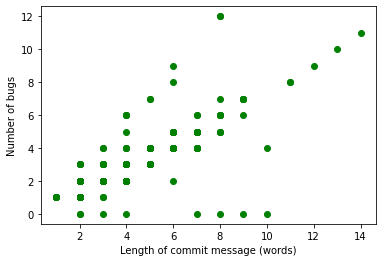

In [9]:
# Initialise X, Y, commit messages
X = np.zeros((18,319), dtype = np.int)
Y = np.zeros((1,319), dtype = np.int)
commit_messages = np.empty((1,319), dtype=object)

# Split into train, dev and test sets and visualise the possible pattern
train_X,train_Y,train_Commit,dev_X,dev_Y,dev_Commit,test_X,test_Y,test_Commit = split(X,Y,commit_messages)

Cost after iteration 0: 12.517775
Back prop works fine. difference = 2.4208137426682193e-09
Back prop works fine. difference = 2.1818146740001977e-09
Back prop works fine. difference = 2.56260888902642e-09
Back prop works fine. difference = 2.443903021368223e-09
Back prop works fine. difference = 2.551314985295022e-09
Back prop works fine. difference = 3.0677434442212416e-09
Back prop works fine. difference = 2.8806552007842367e-09
Back prop works fine. difference = 2.3004516221219685e-09
Back prop works fine. difference = 2.9732662845860597e-09
Back prop works fine. difference = 2.6050687174999447e-09
Back prop works fine. difference = 2.395850603356911e-09
Back prop works fine. difference = 2.582755645135374e-09
Back prop works fine. difference = 2.8914210365568214e-09
Back prop works fine. difference = 2.8953816746320263e-09
Back prop works fine. difference = 3.4002641419760537e-09
Back prop works fine. difference = 3.290975045155964e-09
Back prop works fine. difference = 2.48702537

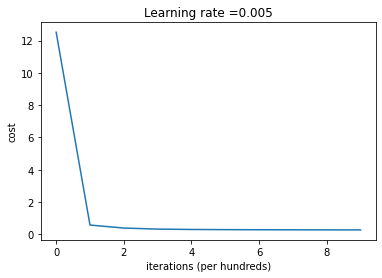

In [10]:
# Compile the model to train parameters
parameters = model(train_X, train_Y, [18,5,5,1], num_iterations = 1000, print_cost = True)

In [11]:
# Prediction on the training set
predict(train_X, train_Y, parameters)

0.7696335078534031

In [12]:
# Prediction on the dev set
predict(dev_X, dev_Y, parameters)

0.671875

In [13]:
# Prediction on the test set
predict(test_X, test_Y, parameters)

0.703125

In [14]:
def compute_cost_with_regularisation(A3, Y, parameters, lambd):
    
    """
    Computes the mean squared error cost after the forward propagation step to see how well the prediction was made
    With Regularisation

    Arguments:
    A3 -- prediction of the number of bugs for every example
    Y -- labels for the examples
    parameters -- trained W and b for every layer l
    lambd -- regularisation parameter lambda

    Return:
    cost -- regularised mean squared error cost 
    """
    
    m = Y.shape[1]
    
    squaredError = np.power((Y - A3), 2)
    meanSquaredErrorCost= np.sum(squaredError, axis=1, keepdims=True)
    meanSquaredErrorCost = meanSquaredErrorCost / m
    
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    W3 = parameters["W3"]
    
    l2RegCost = (1/m) * (lambd/2) * (np.sum(np.square(W1)) + np.sum(np.square(W2)) + np.sum(np.square(W3)))
    
    cost = meanSquaredErrorCost + l2RegCost
    
    return cost

def back_propagation_with_regularisation(X, Y, cache, lambd):
    
    """
    Performs backward propagation on the neural network with regularisation

    Arguments:
    X -- feature-example matrix
    Y -- labels for the examples
    cache -- cached values of W, b, Z and A for every layer
    lambd -- regularisation parameter lambda

    Return:
    gradients -- regularised gradients for W, b, Z, A for every layer (dA is not computed for last layer)
    """
    
    m = X.shape[1]
    (W1,b1,Z1,A1,W2,b2,Z2,A2,W3,b3,Z3,A3) = cache
    
    #dZ3 = np.multiply(np.int64(A3 > 0), np.int64(Z3 > 0))
    dZ3 = 2 * A3 - 2 * Y
    dW3 = (1/m) * np.dot(dZ3, A2.T) + (lambd/m)*W3
    db3 = (1/m) * np.sum(dZ3, axis = 1, keepdims = True)
    
    dA2 = np.dot(W3.T, dZ3)
    dZ2 = np.multiply(dA2, np.int64(A2 > 0))
    dW2 = (1/m) * np.dot(dZ2, A1.T) + (lambd/m)*W2
    db2 = (1/m) * np.sum(dZ2, axis = 1, keepdims = True)
    
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = np.multiply(dA1, np.int64(A1 > 0))
    dW1 = (1/m) * np.dot(dZ1, X.T) + (lambd/m)*W1
    db1 = (1/m) * np.sum(dZ1, axis = 1, keepdims = True)
    
    gradients = {"dZ3": dZ3, "dW3": dW3, "db3": db3,
                 "dA2": dA2, "dZ2": dZ2, "dW2": dW2, "db2": db2,
                 "dA1": dA1, "dZ1": dZ1, "dW1": dW1, "db1": db1}
    
    return gradients

def model_with_regularisation(X,Y,layers_dimensions, alpha = 0.005, lambd = 20, num_iterations = 3000, print_cost=True):
    
    """
    Combines everyting into a single model with regularisation
    """
    
    costs = []
    
    parameters = initialise_parameters(layers_dimensions)
    
    for i in range(0, num_iterations):
        
        A3, cache = forward_propagation(X, parameters)
        
        cost = compute_cost_with_regularisation(A3, Y, parameters, lambd)
        
        gradients = back_propagation_with_regularisation(X, Y, cache, lambd)
        
        parameters = update_parameters(parameters, gradients, alpha)
        
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
        
    
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(alpha))
    plt.show()
    
    return parameters

Cost after iteration 0: 13.563243
Cost after iteration 100: 1.562283
Cost after iteration 200: 1.318988
Cost after iteration 300: 1.185223
Cost after iteration 400: 1.099387
Cost after iteration 500: 1.031529
Cost after iteration 600: 0.973481
Cost after iteration 700: 0.922410
Cost after iteration 800: 0.876568
Cost after iteration 900: 0.835817


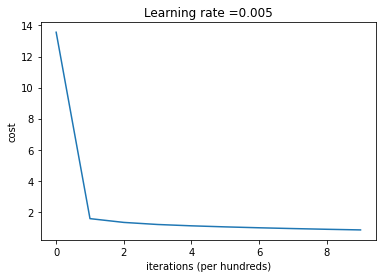

In [15]:
# Compile the model with regularisation to train parameters
parameters = model_with_regularisation(train_X, train_Y, [18,5,5,1], num_iterations = 1000, print_cost = True)

In [16]:
# Prediction on the training set
predict(train_X, train_Y, parameters)

0.7853403141361257

In [17]:
# Prediction on the dev set
predict(dev_X, dev_Y, parameters)

0.75

In [18]:
# Prediction on the test set
predict(test_X, test_Y, parameters)

0.65625

Cost after iteration 0: 14.234466
Cost after iteration 100: 2.060303
Cost after iteration 200: 1.862065
Cost after iteration 300: 1.701716
Cost after iteration 400: 1.564188
Cost after iteration 500: 1.445572
Cost after iteration 600: 1.340820
Cost after iteration 700: 1.249625
Cost after iteration 800: 1.169206
Cost after iteration 900: 1.097837
Cost after iteration 1000: 1.034243
Cost after iteration 1100: 0.977465
Cost after iteration 1200: 0.926736
Cost after iteration 1300: 0.881251
Cost after iteration 1400: 0.840435
Cost after iteration 1500: 0.803865
Cost after iteration 1600: 0.771048
Cost after iteration 1700: 0.741614
Cost after iteration 1800: 0.715205
Cost after iteration 1900: 0.691479
Cost after iteration 2000: 0.670149
Cost after iteration 2100: 0.650974
Cost after iteration 2200: 0.633724
Cost after iteration 2300: 0.618198
Cost after iteration 2400: 0.604232
Cost after iteration 2500: 0.591661
Cost after iteration 2600: 0.580350
Cost after iteration 2700: 0.570173
Cos

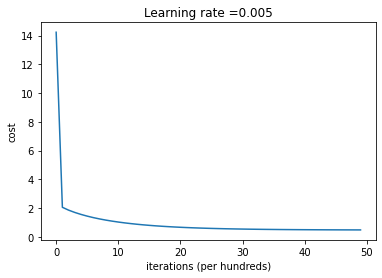

In [19]:
# Compile the model with regularisation and additional hidden units to train parameters
parameters = model_with_regularisation(train_X, train_Y, [18,8,8,1], num_iterations = 5000, print_cost = True)

In [20]:
# Prediction on the training set
predict(train_X, train_Y, parameters)

0.7801047120418848

In [21]:
# Prediction on the dev set
predict(dev_X, dev_Y, parameters)

0.75

In [22]:
# Prediction on the test set
predict(test_X, test_Y, parameters)

0.671875

In [23]:
def initialize_adam(parameters) :
    
    """
    Initialises gradients for the adam optimisation algorithm

    Arguments:
    parameters -- W and b for every layer l

    Return:
    Initialised parameters: v and s for every layer l
    
    v -- first moment estimate
    s -- second moment estimate
    """
    
    L = len(parameters) // 3 # number of layers in the neural network
    v = {}
    s = {}
    
    for l in range(L):
        v["dW" + str(l+1)] = np.zeros((parameters["W" + str(l+1)].shape[0], parameters["W" + str(l+1)].shape[1]))
        v["db" + str(l+1)] = np.zeros((parameters["b" + str(l+1)].shape[0], parameters["b" + str(l+1)].shape[1]))
        s["dW" + str(l+1)] = np.zeros((parameters["W" + str(l+1)].shape[0], parameters["W" + str(l+1)].shape[1]))
        s["db" + str(l+1)] = np.zeros((parameters["b" + str(l+1)].shape[0], parameters["b" + str(l+1)].shape[1]))
    
    return v, s

def update_parameters_with_adam(parameters, gradients, v, s, t, alpha = 0.005,
                                beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8):

    
    """
    Updates parameters according to the gradients, towards minimising the cost function

    Arguments:
    parameters -- W and b for every layer l
    gradients -- gradients for W, b, Z, A for every layer (dA is not computed for last layer)
    v -- first moment estimate
    s -- second moment estimate
    t -- adam parameter, represents iteration number
    alpha -- learning rate
    beta1 -- parameter for moving averages of the gradients
    beta2 -- parameter for moving averages of the squared gradients
    epsilon -- constant needed to avoid division by 0 error

    Return:
    parameters -- updated parameters W and b for every layer l
    v -- updated first moment estimate
    s -- updated second moment estimate
    """
    
    L = len(parameters) // 3                 # number of layers in the neural network
    v_corrected = {}                         # Initializing first moment estimate, python dictionary
    s_corrected = {}                         # Initializing second moment estimate, python dictionary
    
    # Perform Adam update on all parameters
    for l in range(L):
        # Moving average of the gradients
        v["dW" + str(l+1)] = beta1 * v["dW" + str(l+1)] + (1 - beta1) * gradients["dW" + str(l+1)]
        v["db" + str(l+1)] = beta1 * v["db" + str(l+1)] + (1 - beta1) * gradients["db" + str(l+1)]

        # Compute bias-corrected first moment estimate
        v_corrected["dW" + str(l+1)] = v["dW" + str(l+1)] / (1 - math.pow(beta1, t))
        v_corrected["db" + str(l+1)] = v["db" + str(l+1)] / (1 - math.pow(beta1, t))

        # Moving average of the squared gradients
        s["dW" + str(l+1)] = beta2 * s["dW" + str(l+1)] + (1 - beta2) * np.power(gradients["dW" + str(l+1)], 2)
        s["db" + str(l+1)] = beta2 * s["db" + str(l+1)] + (1 - beta2) * np.power(gradients["db" + str(l+1)], 2)

        # Compute bias-corrected second raw moment estimate
        s_corrected["dW" + str(l+1)] = s["dW" + str(l+1)] / (1 - math.pow(beta2, t))
        s_corrected["db" + str(l+1)] = s["db" + str(l+1)] / (1 - math.pow(beta2, t))

        # Update parameters
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - alpha * (v_corrected["dW" + str(l+1)]/(np.sqrt(s_corrected["dW" + str(l+1)])+epsilon))
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - alpha * (v_corrected["db" + str(l+1)]/(np.sqrt(s_corrected["db" + str(l+1)])+epsilon))

    return parameters, v, s

In [24]:
def model_with_adam(X, Y, layers_dimensions, alpha = 0.00034, lambd = 21, beta1 = 0.9,
                    beta2 = 0.999,  epsilon = 1e-8, num_iterations = 5000, print_cost = True):
    
    
    """
    Combines everyting into a single model with Adam optimiser
    """
    
    costs = []
    
    # Adam parameter, represents iteration number
    t = 0
    
    parameters = initialise_parameters(layers_dimensions)
    
    v, s = initialize_adam(parameters)
    
    for i in range(0, num_iterations):
        
        A3, cache = forward_propagation(X, parameters)
        
        # Adding regularisation as well
        
        cost = compute_cost_with_regularisation(A3, Y, parameters, lambd)
        
        gradients = back_propagation_with_regularisation(X, Y, cache, lambd)
        
        t = t + 1
        
        parameters, v, s = update_parameters_with_adam(parameters, gradients, v, s,
                                                               t, alpha, beta1, beta2,  epsilon)
        
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
        
    
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(alpha))
    plt.show()
    
    return parameters

Cost after iteration 0: 13.615517
Cost after iteration 100: 12.792479
Cost after iteration 200: 9.590739
Cost after iteration 300: 5.917655
Cost after iteration 400: 3.551653
Cost after iteration 500: 2.406372
Cost after iteration 600: 1.888862
Cost after iteration 700: 1.577838
Cost after iteration 800: 1.367788
Cost after iteration 900: 1.219539
Cost after iteration 1000: 1.110866
Cost after iteration 1100: 1.030614
Cost after iteration 1200: 0.972056
Cost after iteration 1300: 0.926822
Cost after iteration 1400: 0.889954


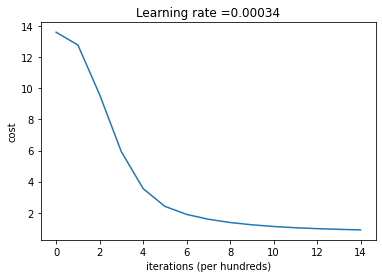

In [37]:
# Compile the model with regularisation to train parameters
parameters = model_with_adam(train_X, train_Y, [18,5,5,1], num_iterations = 1500, print_cost = True)

In [38]:
# Prediction on the training set
predict(train_X, train_Y, parameters)

0.7905759162303665

In [39]:
# Prediction on the dev set
predict(dev_X, dev_Y, parameters)

0.734375

In [40]:
# Prediction on the test set
predict(test_X, test_Y, parameters)

0.78125

In [29]:
def extract_repo_name(array, exampleNumber):
    repoName = ''
    
    if (array[0][exampleNumber] == 1):
        repoName = 'mlm'
    elif (array[1][exampleNumber] == 1):
        repoName = 'standard'
    elif (array[2][exampleNumber] == 1):
        repoName = 'agent'
    elif (array[3][exampleNumber] == 1):
        repoName = 'conductor'
    elif (array[4][exampleNumber] == 1):
        repoName = 'dockers'
    elif (array[5][exampleNumber] == 1):
        repoName = 'sensor'
    
    return repoName

def extract_day_time(array, exampleNumber):
    dayTime = ''
    
    if (array[6][exampleNumber] == 1):
        dayTime = 'am'
    elif (array[7][exampleNumber] == 1):
        dayTime = 'pm'
        
    return dayTime

def extract_name(array, exampleNumber):
    name = ''
    
    if (array[8][exampleNumber] == 1):
        name = 'Victor'
    elif (array[9][exampleNumber] == 1):
        name = 'Peggy'
    elif (array[10][exampleNumber] == 1):
        name = 'Wendy'
    elif (array[11][exampleNumber] == 1):
        name = 'Trudy'
    elif (array[12][exampleNumber] == 1):
        name = 'Mallory'
    elif (array[13][exampleNumber] == 1):
        name = 'Eve'
    elif (array[14][exampleNumber] == 1):
        name = 'Dabe'
    elif (array[15][exampleNumber] == 1):
        name = 'Carol'
    elif (array[16][exampleNumber] == 1):
        name = 'Bob'
        
    return name
    
def extract_commit_message_length(array, exampleNumber):
    return str(array[17][exampleNumber])  

def extract_all_info(array, exampleNumber):
    info =  'Repo = '    + extract_repo_name(array, exampleNumber) + ', '
    info = info + 'DayTime = ' + extract_day_time(array, exampleNumber) + ', '
    info = info + 'Name = ' + extract_name(array, exampleNumber) + ', '
    info = info + 'MessageLength = ' + extract_commit_message_length(array, exampleNumber)
    
    return info

In [30]:
def print_total_num_bugs_person():
    
    numExamples = train_X.shape[1]
    
    victorBugs = 0 
    peggyBugs = 0 
    wendyBugs = 0 
    trudyBugs = 0
    malloryBugs = 0
    eveBugs = 0 
    dabeBugs = 0
    carolBugs = 0
    bobBugs = 0
    
    for exampleNum in range(numExamples):
        name = extract_name(train_X, exampleNum)
        bugs = train_Y[0][exampleNum]
        
        if (name == 'Victor'):
            victorBugs += bugs
        elif (name == 'Peggy'):
            peggyBugs += bugs
        elif (name == 'Wendy'):
            wendyBugs += bugs
        elif (name == 'Trudy'):
            trudyBugs += bugs
        elif (name == 'Mallory'):
            malloryBugs += bugs
        elif (name == 'Eve'):
            eveBugs += bugs
        elif (name == 'Dabe'):
            dabeBugs += bugs
        elif (name == 'Carol'):
            carolBugs += bugs
        elif (name == 'Bob'):
            bobBugs += bugs
    
    print('In the training set: \n')
    
    print('Total number bugs for Victor: '  + str(int(victorBugs)))
    print('Total number bugs for Peggy: '   + str(int(peggyBugs)))
    print('Total number bugs for Wendy: '   + str(int(wendyBugs)))
    print('Total number bugs for Trudy: '   + str(int(trudyBugs)))
    print('Total number bugs for Mallory: ' + str(int(malloryBugs)))
    print('Total number bugs for Eve: '     + str(int(eveBugs)))
    print('Total number bugs for Dabe: '    + str(int(dabeBugs)))
    print('Total number bugs for Carol: '   + str(int(carolBugs)))
    print('Total number bugs for Bob: '     + str(int(bobBugs)))
        

In [31]:
print_total_num_bugs_person()

In the training set: 

Total number bugs for Victor: 284
Total number bugs for Peggy: 7
Total number bugs for Wendy: 68
Total number bugs for Trudy: 12
Total number bugs for Mallory: 134
Total number bugs for Eve: 26
Total number bugs for Dabe: 51
Total number bugs for Carol: 0
Total number bugs for Bob: 3


In [32]:
def find_out_human_accuracy(dev_X, dev_Y):
    
    numExamples = dev_Y.shape[1] // 2
    examplesGotWrong = 0
    
    for exampleNum in range(numExamples):
        print(extract_all_info(dev_X, exampleNum))
        currentBugsNumber = dev_Y[0][exampleNum]
        myGuess = int(input("Given the above example, please guess the number of bugs"))
        
        if (currentBugsNumber != myGuess):
            examplesGotWrong += 1
        
    accuracy = (numExamples - examplesGotWrong)/numExamples
    
    return accuracy

In [33]:
#bayesError = 1 - find_out_human_accuracy(dev_X, dev_Y)

In [34]:
#print(bayesError)

In [35]:
def predicted_wrong(X, Y, commit_messages, parameters):
    
    m = X.shape[1]
    prediction = np.zeros((1,m), dtype = np.int)
    
    # Initialise
    predictedWrong = np.empty((18,m), dtype = np.int)
    bugsPredicted = np.empty((1,m), dtype = np.int)
    actualBugs = np.empty((1,m), dtype = np.int)
    commitMessages = np.empty((1,m), dtype = object)
    countWrong = 0
    
    A3, caches = forward_propagation(X, parameters)
    
    # Convert decimal predictions into an integer prediction for number of bugs
    for i in range(0, A3.shape[1]):
        prediction = np.round(A3, 0)
    
    for i in range(m):
        if (prediction[0,i] != Y[0,i]):
            
            predictedWrong[:,countWrong] = X[:,i]
            
            bugsPredicted[0,countWrong] = prediction[0,i]
            actualBugs[0,countWrong] = Y[0,i]
            
            commitMessages[0,countWrong] = commit_messages[0,i]
            
            countWrong += 1   
    
    predictedWrong = predictedWrong[:,0:countWrong]
    
    bugsPredicted = bugsPredicted[:,0:countWrong]
    actualBugs = actualBugs[:,0:countWrong]
    
    commitMessages = commitMessages[:,0:countWrong]
    
    return predictedWrong, bugsPredicted, actualBugs, commitMessages

def show_wrong_classified(X, Y, commit_messages, parameters):    
        
    infoX = ''    
        
    predictedWrong, bugsPredicted, actualBugs, commitMessages = predicted_wrong(X, Y, commit_messages, parameters)
    
    print('Examples misclassified: ' + str(predictedWrong.shape[1]) + '\n')
    
    for i in range(predictedWrong.shape[1]):
        infoX = extract_all_info(predictedWrong, i)
        
        print(infoX + ', CommitMessage = ' + str(commitMessages[0,i]))
        
        print("Bugs predicted: " + str(bugsPredicted[0][i]) + ", Actual Bugs: " + str(actualBugs[0][i]) + "\n")

In [36]:
show_wrong_classified(dev_X, dev_Y, dev_Commit, parameters)

Examples misclassified: 17

Repo = standard, DayTime = pm, Name = Wendy, MessageLength = 2, CommitMessage = fix trap
Bugs predicted: 2, Actual Bugs: 1

Repo = mlm, DayTime = am, Name = Victor, MessageLength = 7, CommitMessage = Скрипт для создания датасета из csv файла
Bugs predicted: 6, Actual Bugs: 5

Repo = standard, DayTime = pm, Name = Wendy, MessageLength = 5, CommitMessage = Merge branch 'master' of 
Bugs predicted: 4, Actual Bugs: 3

Repo = sensor, DayTime = am, Name = Victor, MessageLength = 2, CommitMessage = zabbix fixes
Bugs predicted: 1, Actual Bugs: 0

Repo = conductor, DayTime = pm, Name = Victor, MessageLength = 3, CommitMessage = changed default port
Bugs predicted: 2, Actual Bugs: 3

Repo = dockers, DayTime = pm, Name = Carol, MessageLength = 9, CommitMessage = ciscoasa_v2: add logging, file.log -> file.json; some bugs fixed
Bugs predicted: 6, Actual Bugs: 0

Repo = dockers, DayTime = pm, Name = Carol, MessageLength = 10, CommitMessage = kako_v2: -you can change activ